In [2]:
from cProfile import label

import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

# CNN #
### Load Data

In [3]:
# Model / data parameters
num_classes = 10
input_shape = (32, 32, 3)

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

### Experiment
#### Number of Convolution

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3384 - loss: 1.8570 - val_accuracy: 0.5120 - val_loss: 1.4201
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5101 - loss: 1.4063 - val_accuracy: 0.5528 - val_loss: 1.3012
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5440 - loss: 1.2994 - val_accuracy: 0.5704 - val_loss: 1.2478
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5691 - loss: 1.2460 - val_accuracy: 0.5792 - val_loss: 1.2057
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5816 - loss: 1.2066 - val_accuracy: 0.5906 - val_loss: 1.1877
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.3223 - loss: 1.8518 - val_accuracy: 0.5258 - val_loss: 1.3442
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.5196 - loss: 1.3589 - val_accuracy: 0.5666 - val_loss: 1.2337
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 14s 40ms/step - accuracy: 0.5657 - loss: 1.2333 - val_accuracy:

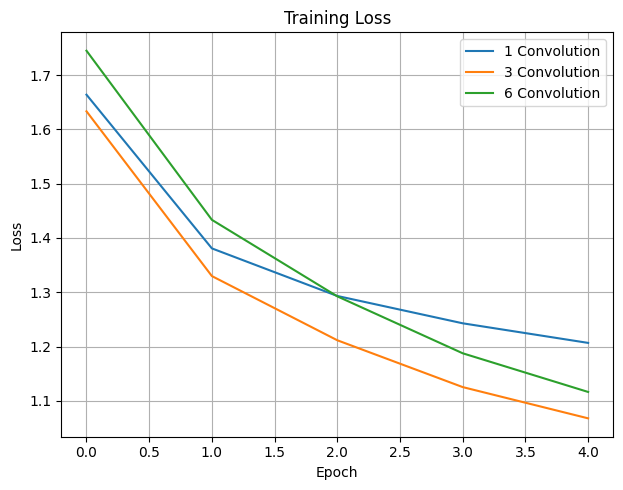

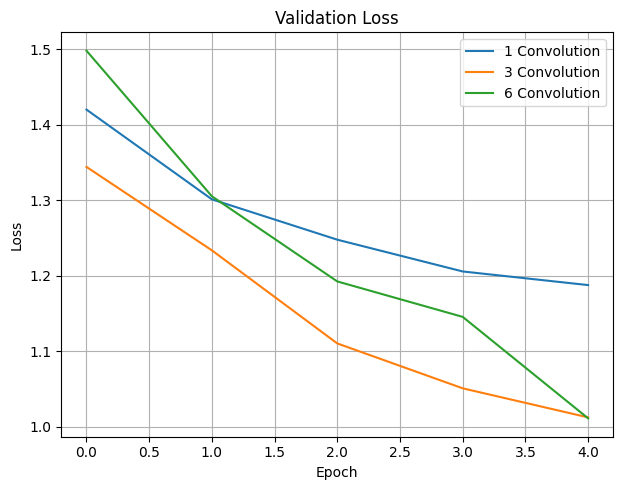

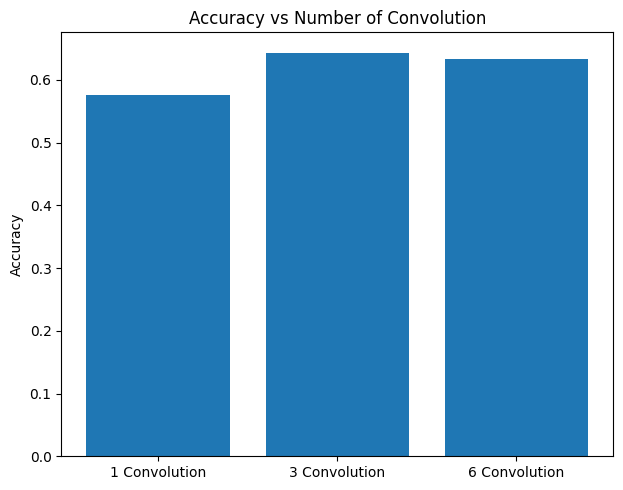

In [4]:
batch_size = 128
epochs = 5

conv = {
    "1 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ], 
    "3 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ],
    "6 Convolution" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")

    ]
}



accuracy = []
train_loss = {}
val_loss = {}

for name, data in conv.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in conv.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Number of Convolution")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


### Number of Filter

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.3258 - loss: 1.8806 - val_accuracy: 0.5232 - val_loss: 1.4262
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5159 - loss: 1.3978 - val_accuracy: 0.5586 - val_loss: 1.2941
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5525 - loss: 1.2918 - val_accuracy: 0.5868 - val_loss: 1.2300
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5697 - loss: 1.2346 - val_accuracy: 0.5838 - val_loss: 1.2156
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5854 - loss: 1.2008 - val_accuracy: 0.5996 - val_loss: 1.1653
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.3555 - loss: 1.8095 - val_accuracy: 0.5346 - val_loss: 1.3555
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.5414 - loss: 1.3276 - val_accuracy: 0.5570 - val_loss: 1.2675
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.5804 - loss: 1.2172 - val_accuracy: 0.

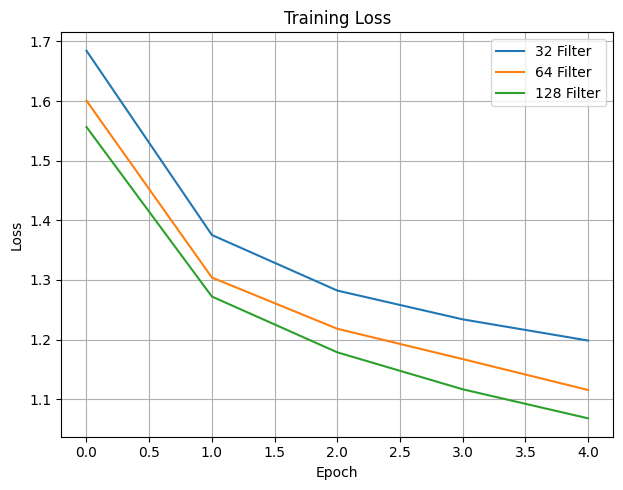

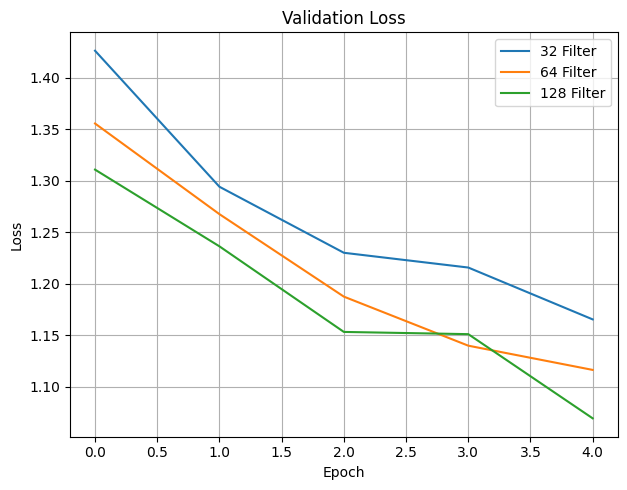

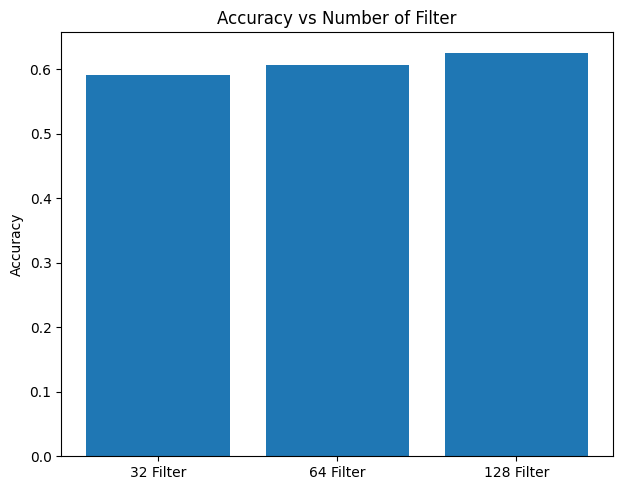

In [9]:


num_of_fiter = {
    "32 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ],
    "64 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ],
    "128 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}

for name, data in num_of_fiter.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in num_of_fiter.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Number of Filter")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


### Size of Filter

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.3356 - loss: 1.8700 - val_accuracy: 0.5124 - val_loss: 1.4156
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5086 - loss: 1.4133 - val_accuracy: 0.5480 - val_loss: 1.3169
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5448 - loss: 1.3087 - val_accuracy: 0.5678 - val_loss: 1.2529
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5644 - loss: 1.2502 - val_accuracy: 0.5890 - val_loss: 1.2122
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5749 - loss: 1.2186 - val_accuracy: 0.5946 - val_loss: 1.1781
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.2971 - loss: 1.9392 - val_accuracy: 0.4698 - val_loss: 1.5069
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4571 - loss: 1.5238 - val_accuracy: 0.5090 - val_loss: 1.4080
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.4862 - loss: 1.4604 - val_accuracy: 0.

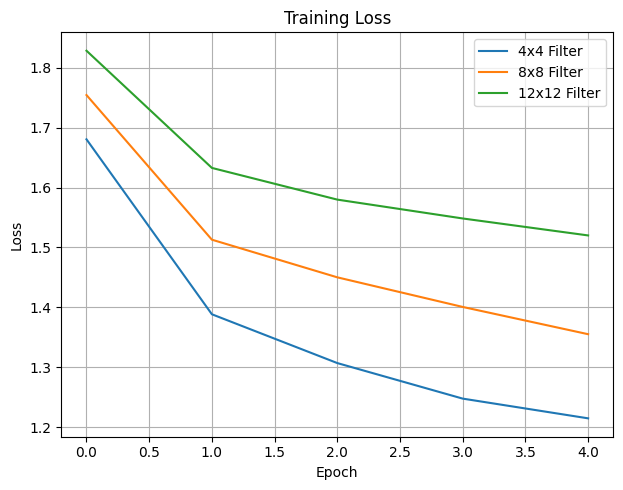

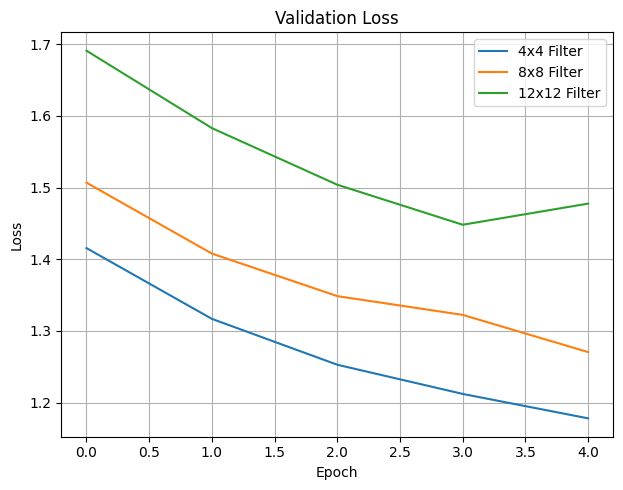

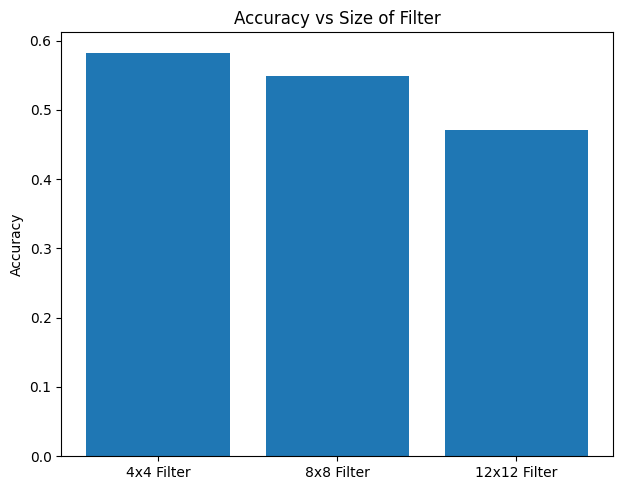

In [8]:
size_of_fiter = {
    "4x4 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ],
    "8x8 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(8, 8), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ],
    "12x12 Filter" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(12, 12), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}

for name, data in size_of_fiter.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in size_of_fiter.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Size of Filter")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

### Pooling

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.3348 - loss: 1.8689 - val_accuracy: 0.5152 - val_loss: 1.4101
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5046 - loss: 1.4075 - val_accuracy: 0.5502 - val_loss: 1.3080
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5365 - loss: 1.3181 - val_accuracy: 0.5656 - val_loss: 1.2485
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5577 - loss: 1.2654 - val_accuracy: 0.5816 - val_loss: 1.2265
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5731 - loss: 1.2247 - val_accuracy: 0.5948 - val_loss: 1.1796
Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3188 - loss: 1.9002 - val_accuracy: 0.4744 - val_loss: 1.5016
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.4784 - loss: 1.4870 - val_accuracy: 0.5294 - val_loss: 1.3758
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5148 - loss: 1.3775 - val_accuracy: 0

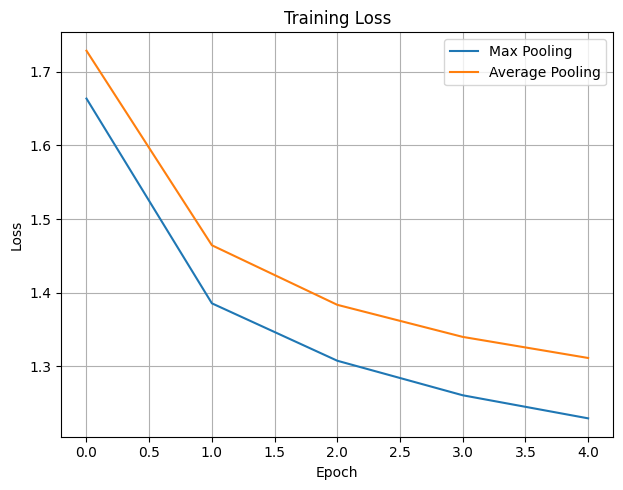

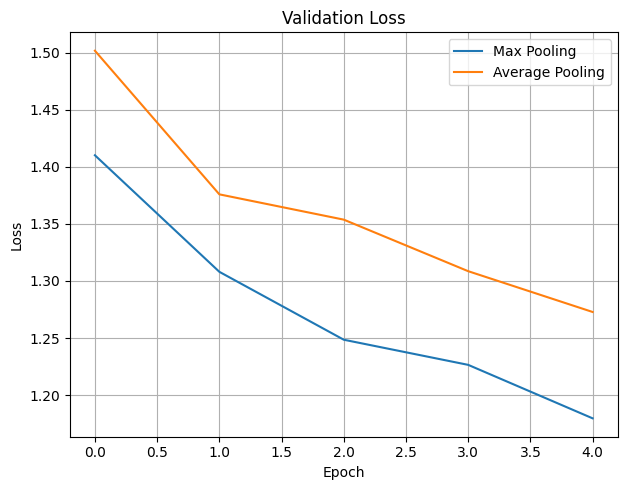

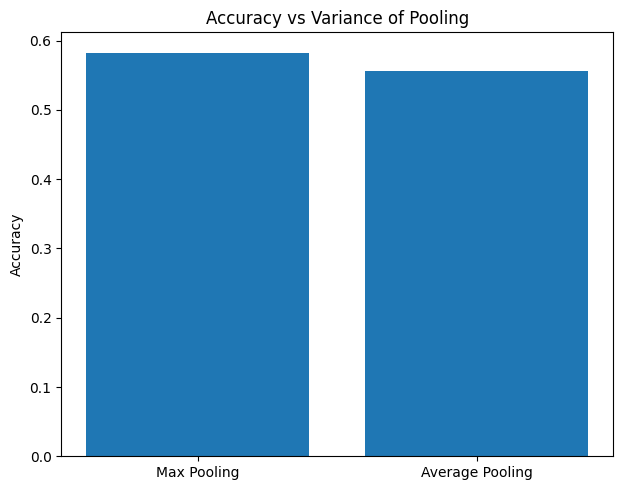

In [11]:
variance_of_pooling = {
    "Max Pooling" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ],
    "Average Pooling" : [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(4, 4), activation="relu"),
        layers.AveragePooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax")
    ]
}

accuracy = []
train_loss = {}
val_loss = {}

for name, data in variance_of_pooling.items():
    model = keras.Sequential(data)
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
    train_loss[name] = history.history["loss"]
    val_loss[name] = history.history["val_loss"]
    
    score = model.evaluate(x_test, y_test, verbose=0)
    accuracy.append(score[1])  

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in train_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

for name, tl in val_loss.items():
    plt.plot(tl, label=name)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)

names = [name for name in variance_of_pooling.keys()]

plt.bar(names, accuracy)
plt.title("Accuracy vs Variance of Pooling")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()